In [4]:
import os, json
import numpy as np

# walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]
# for dirpath, dirnames, filenames in walk:
#     if "testingSetScores.json" in filenames:
#         data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
#         # sort data
#         data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
#         deltas = []
#         for k in data:
#             initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
#             optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
#             delta = optimized_prompt_score - initial_prompt_score
#             deltas.append(delta)
            
#         print(deltas)
#         avg_change = sum(deltas) / len(deltas)
#         print(f"Avg change: {dirpath}: {avg_change}")
        
        
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    deltas = []
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        delta = optimized_prompt_score - initial_prompt_score
        deltas.append(delta)
        
    print(deltas)
    avg_change = np.mean(deltas)
    std = np.std(deltas)
    ci = 1.96 * std / np.sqrt(len(deltas))
    print(f"Avg change: {avg_change}")
    print(f"Std: {std}")
    print(f"95% CI: {ci}")
    
    # Plot the points on a vertical line with the confidence interval
    # import matplotlib.pyplot as plt
    # xs = np.zeros(len(deltas))
    # plt.figure()
    # plt.errorbar(xs, deltas, yerr=ci, fmt='o')
    # plt.show()

[3.3940579623073894, 0.04411803867979813, 1.7363078135834193, 45.23336505195681, 1.7888163506949581, 14.876755882830167, 44.409616226227676, 9.184177601366908, 22.78324822367182, 28.25583900890654, 12.169304154122186, -0.013364012090320898, 46.66658522200437, 4.525095753552897, 7.924657936663362, 5.096173201750744, 3.3418923675974312, 6.566519891624129, 24.281366347076595, 20.671332189451835, 3.9587689467567486, 5.513282932512013, 6.585098237621793, 51.025237278603655, 60.70668197526997, 2.525347887775851, 53.1829379745023, 5.369890460321031, 51.86391970911513, 44.10220228684249, 0.11773305399778522, 1.4643255586658341, 1.0367245470829545, 12.520190665145531, 5.316407547082051, 24.044102023038477]
Avg change: 17.563019897119787
Std: 18.7853878776577
95% CI: 6.136560040034849


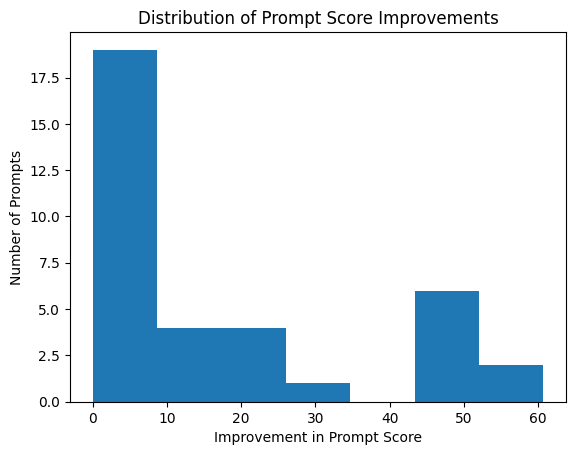

In [5]:
import matplotlib.pyplot as plt
plt.hist(deltas, bins=7)
plt.xlabel("Improvement in Prompt Score")
plt.ylabel("Number of Prompts")
plt.title("Distribution of Prompt Score Improvements")
plt.show()

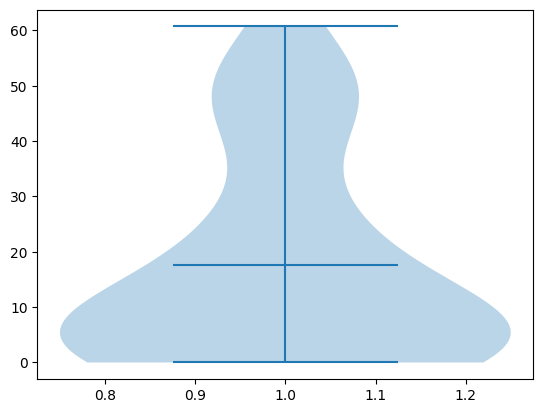

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.violinplot(deltas, showmeans=True)
plt.show()